# Assignment: Decision trees and random forests

## Business understanding

Define business problem that needs to be solved.
- What is the goal of the analysis?
- What are the requirements and constraints?
- What is the expected outcome?

Objectives of this assignment are to make decision trees to build a transparent, human-readable predictive model and use random forests for improved predictive performance.

In [1]:
# hello world

## Data understanding

collect and explore the data.
- What data is available? What are the characteristics of the data (variable types, value distributions etc.)?
- Are there any quality issues with the data (missing values, outliers, nonsensical values)?

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets 
  
# metadata 
print(phishing_websites.metadata) 
  
# variable information 
print(phishing_websites.variables) 


{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

In [4]:
import pandas as pd

# Yhdistetään ominaisuudet (X) ja target (y) yhdeksi DataFrameksi
df = pd.concat([X, y], axis=1)

# Katsotaan alku ymmärtämisen helpottamiseksi
df.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Provided specifications

Data consists of 31 attributes:  
- 30 numeric variables (features)  
- 1 target variable (result)  

### Target variable:
- **result**: Legitimate (1) / Phishing (-1)


### Measured features (numeric):

| Feature Name               | Description | Values |
|-----------------------------|-------------|--------|
| having_ip_address           | Checks if an IP address is used instead of a domain name in the URL. | Legitimate (1), Phishing (-1) |
| url_length                  | Length of the URL; long URLs may hide suspicious parts. | Legitimate (1), Suspicious (0), Phishing (-1) |
| shortining_service          | Whether a URL shortening service (e.g., bit.ly) is used. | Legitimate (1), Phishing (-1) |
| having_at_symbol            | Presence of “@” symbol in the URL, which can obscure the true address. | Legitimate (1), Phishing (-1) |
| double_slash_redirecting    | Presence and location of “//” in the URL path (may redirect). | Legitimate (1), Phishing (-1) |
| prefix_suffix               | Usage of “-” in the domain (rare in legitimate URLs). | Legitimate (1), Phishing (-1) |
| having_sub_domain           | Count of subdomains in the URL; multiple subdomains can be suspicious. | Legitimate (1), Suspicious (0), Phishing (-1) |
| sslfinal_state              | Presence and validity of HTTPS/SSL certificate. | Legitimate (1), Suspicious (0), Phishing (-1) |
| domain_registration_length  | Domain age based on WHOIS info; short-lived domains are suspicious. | Legitimate (1), Phishing (-1) |
| favicon                     | Whether favicon is loaded from another domain. | Legitimate (1), Phishing (-1) |
| port                        | Usage of non-standard or uncommon ports. | Legitimate (1), Phishing (-1) |
| https_token                 | Presence of misleading “https” token in the domain part of the URL. | Legitimate (1), Phishing (-1) |
| request_url                 | External objects (images, videos, etc.) loaded from another domain. | Legitimate (1), Phishing (-1) |
| url_of_anchor               | Examines `<a>` tags; empty or irrelevant anchors are suspicious. | Legitimate (1), Suspicious (0), Phishing (-1) |
| links_in_tags               | Links in `<Meta>`, `<Script>`, `<Link>` tags pointing outside the domain. | Legitimate (1), Suspicious (0), Phishing (-1) |
| sfh                         | Server Form Handler — empty or mismatched domain in forms. | Legitimate (1), Suspicious (0), Phishing (-1) |
| submitting_to_email         | Whether forms submit data directly to an email address. | Legitimate (1), Phishing (-1) |
| abnormal_url                | Whether the URL identity mismatches WHOIS information. | Legitimate (1), Phishing (-1) |
| redirect                    | Number of redirects the page performs. | Legitimate (1), Suspicious (0) |
| on_mouseover                | JavaScript that changes status bar on hover (hides true URL). | Legitimate (1), Phishing (-1) |
| rightclick                  | JavaScript disabling right-click (prevents source inspection). | Legitimate (1), Phishing (-1) |
| popupwindow                 | Usage of pop-up windows requesting user information. | Legitimate (1), Phishing (-1) |
| iframe                      | Presence of hidden iframes in the page. | Legitimate (1), Phishing (-1) |
| age_of_domain               | Domain age from WHOIS records (short-lived → suspicious). | Legitimate (1), Phishing (-1) |
| dnsrecord                   | Existence of DNS records for the domain. | Legitimate (1), Phishing (-1) |
| web_traffic                 | Website popularity/traffic from Alexa ranking. | Legitimate (1), Suspicious (0), Phishing (-1) |
| page_rank                   | PageRank score of the website (legitimacy indicator). | Legitimate (1), Phishing (-1) |
| google_index                | Whether the site is indexed by Google. | Legitimate (1), Phishing (-1) |
| links_pointing_to_page      | Number of external links pointing to the webpage. | Legitimate (1), Suspicious (0), Phishing (-1) |
| statistical_report          | Matches domains/IPs from phishing blacklists (PhishTank, StopBadware). | Legitimate (1), Phishing (-1) |


In [5]:
#Tarkistetaan mitä valueita voi olla missäkin ominaisuudessa.
for col in df.columns:
    print(col, df[col].unique())

having_ip_address [-1  1]
url_length [ 1  0 -1]
shortining_service [ 1 -1]
having_at_symbol [ 1 -1]
double_slash_redirecting [-1  1]
prefix_suffix [-1  1]
having_sub_domain [-1  0  1]
sslfinal_state [-1  1  0]
domain_registration_length [-1  1]
favicon [ 1 -1]
port [ 1 -1]
https_token [-1  1]
request_url [ 1 -1]
url_of_anchor [-1  0  1]
links_in_tags [ 1 -1  0]
sfh [-1  1  0]
submitting_to_email [-1  1]
abnormal_url [-1  1]
redirect [0 1]
on_mouseover [ 1 -1]
rightclick [ 1 -1]
popupwindow [ 1 -1]
iframe [ 1 -1]
age_of_domain [-1  1]
dnsrecord [-1  1]
web_traffic [-1  0  1]
page_rank [-1  1]
google_index [ 1 -1]
links_pointing_to_page [ 1  0 -1]
statistical_report [-1  1]
result [-1  1]


## Data preparation

data preprocessing
- cleaning the data
- transforming the data
- selecting the relevant features

### Splitting data

In [6]:
from sklearn.model_selection import train_test_split

# 70% of the data will be used for training, 30% for testing
randomstate = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = randomstate)

## Decision Tree

choose a machine learning method and train the model (+ model validation)
- which method was used?
- which parameters were used?
- what was the performance of the model?

We used a Decision Tree Classifier as the machine learning method. This method builds a tree of “if–else” rules that split the dataset based on feature values, predicting whether a site is phishing or legitimate. The parameter for max_depth was only used in constructing the figure for readability purposes, and was not used in the classifier as it decreases accuracy considerably when dealing with a large number of attributes.

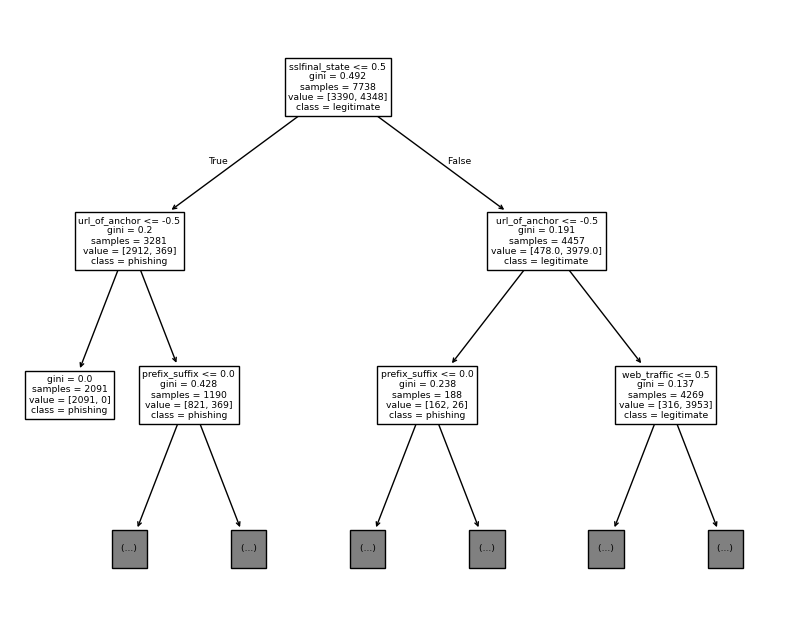

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree  

# build the classifier
model = DecisionTreeClassifier(random_state = randomstate)
model.fit(X_train, y_train)

# create the decision tree figure
fig = plt.figure(figsize = (10, 8))
plot_tree(model, max_depth = 2, feature_names = X.keys(), class_names = ['phishing', 'legitimate'])
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

preds = model.predict(X_test) # predicting with the decision tree using the test set
confusion_matrix(y_test, preds) # printing a confusion matrix of the results

array([[1431,   77],
       [  55, 1754]])

Based on the results of the test set, 77 phishing websites were incorrectly labeled as legitimate, and conversely 55 legitimate sites were named to be phishing. However, 3185 sites in total were predicted correctly.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# print evaluation metrics
print("\n--- Evaluation Metrics for the Decision Tree ---\n")
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))


--- Evaluation Metrics for the Decision Tree ---

Accuracy: 0.9602050045221586
Precision: 0.9579464773347898
Recall: 0.9695964621337756
F1 Score: 0.9637362637362638


### Instructions for an internet analyst

These instructions allow an analyst to manually classify a website as phishing or legitimate based on the decision tree model demonstrated above.

#### **Step 1:** Check the presence and validity of HTTPS/SSL certificate | *sslfinal_state* 

If there is no valid HTTPS/SLL certificate, classify the site as phishing.

Otherwise, continue to Step 2.

#### **Step 2:** Examine <a> tags; empty or irrelevant anchors are suspicious | *url_of_anchor*

If there is a notable amount of empty or irrelevant anchors, classify as phishing.

If there are some empty or irrelevant anchors, classify as suspicious and continue to Step 3, as well as if there are none.

#### **Step 3:** Check the website's popularity/traffic from Alexa ranking | *web_traffic*

If there is no popularity nor traffic, classify as phishing.

If there is some popularity or traffic, classify as suspicious and continue to examine the attributes of the website.

Otherwise, classify the site as legitimate.

## Random Forest

choose a machine learning method and train the model (+ model validation)
- which method was used?
- which parameters were used?
- what was the performance of the model?


Random Forest: n_estimators=50, max_depth=None
Confusion matrix:
[[1347  161]
 [  71 1738]]
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92      1508
           1       0.92      0.96      0.94      1809

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Feature importances:
[4.43263503e-03 2.17330191e-03 1.64421208e-03 3.21648338e-04
 1.23462942e-03 3.60971750e-02 7.82572929e-02 3.96729295e-01
 1.44007834e-02 8.76991364e-04 4.27936572e-04 9.48428166e-04
 1.73566679e-02 2.93631569e-01 2.86907693e-02 1.49835176e-02
 5.14767054e-04 1.75369320e-03 4.14037013e-04 7.08900678e-04
 2.00541074e-05 1.77417896e-03 3.77609457e-04 4.61080025e-03
 3.05140538e-03 8.08017191e-02 3.30844089e-03 5.74338050e-03
 3.85078621e-03 8.63374642e-04]


c:\Users\liula\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


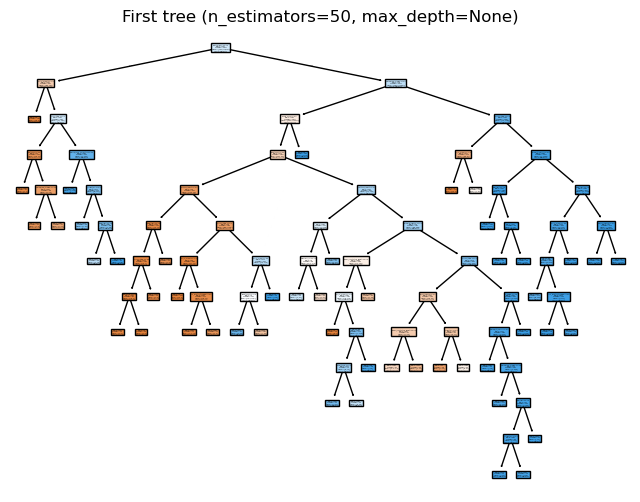


Random Forest: n_estimators=100, max_depth=None


c:\Users\liula\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion matrix:
[[1348  160]
 [  79 1730]]
              precision    recall  f1-score   support

          -1       0.94      0.89      0.92      1508
           1       0.92      0.96      0.94      1809

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Feature importances:
[4.96407200e-03 1.71682904e-03 1.91599236e-03 3.23919839e-04
 1.16613497e-03 4.39519524e-02 6.18618664e-02 4.11241629e-01
 1.22774797e-02 1.11054409e-03 4.13909228e-04 8.69765654e-04
 1.87761757e-02 2.86715317e-01 3.13905116e-02 1.95981513e-02
 7.05271699e-04 1.72293559e-03 4.68204859e-04 7.42079992e-04
 1.00746018e-05 1.32327320e-03 3.55036928e-04 4.24817806e-03
 3.62479289e-03 7.51437397e-02 3.32719702e-03 4.99612632e-03
 3.95858310e-03 1.08025616e-03]


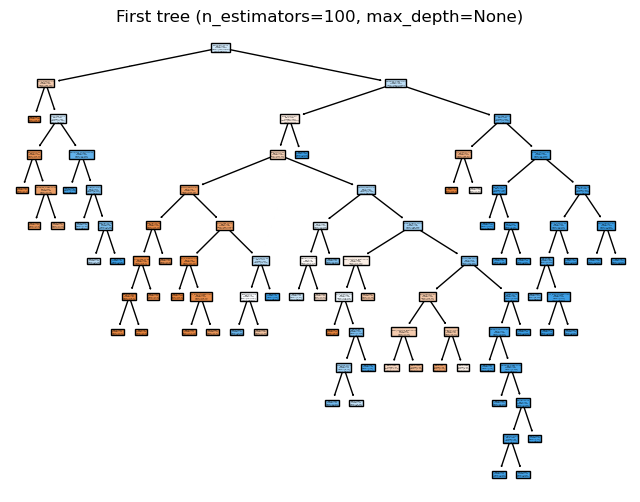


Random Forest: n_estimators=100, max_depth=5


c:\Users\liula\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion matrix:
[[1339  169]
 [  85 1724]]
              precision    recall  f1-score   support

          -1       0.94      0.89      0.91      1508
           1       0.91      0.95      0.93      1809

    accuracy                           0.92      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

Feature importances:
[5.14478317e-03 1.35777336e-03 1.75916048e-03 5.26882340e-04
 5.47577425e-04 5.24291678e-02 6.79837284e-02 4.15749152e-01
 1.30755075e-02 6.15080174e-04 2.35522147e-04 6.94078989e-04
 1.83765813e-02 2.65443106e-01 2.50723805e-02 2.02841348e-02
 4.75999342e-04 1.36517046e-03 9.33453617e-04 7.42136262e-04
 4.71503302e-06 2.20201604e-03 1.91986874e-04 3.85430104e-03
 2.81577320e-03 8.63059270e-02 3.87205350e-03 4.64895903e-03
 2.48834662e-03 8.04545393e-04]


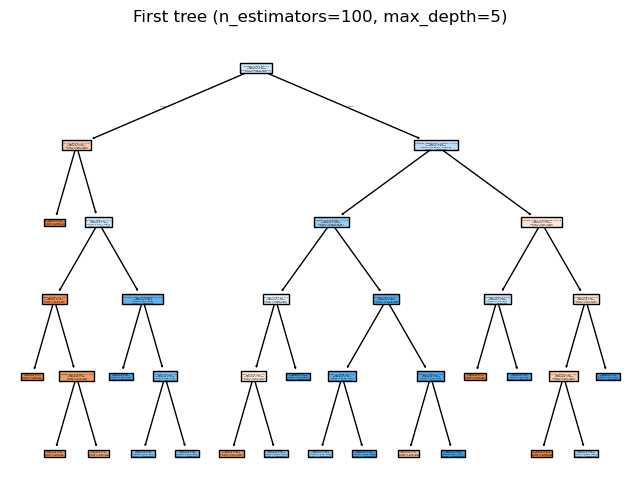


Random Forest: n_estimators=100, max_depth=10


c:\Users\liula\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion matrix:
[[1345  163]
 [  77 1732]]
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92      1508
           1       0.91      0.96      0.94      1809

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Feature importances:
[5.42311323e-03 1.60104002e-03 2.22323516e-03 3.71950949e-04
 1.13293212e-03 4.34242536e-02 6.31257216e-02 4.15553913e-01
 1.20768788e-02 1.36330018e-03 4.86811575e-04 1.06172921e-03
 1.95054424e-02 2.79244261e-01 3.13122794e-02 2.04235099e-02
 6.61224383e-04 1.74041724e-03 5.45823143e-04 7.14124927e-04
 1.10480990e-05 1.34720328e-03 2.97033454e-04 4.12710360e-03
 3.52878114e-03 7.49803093e-02 3.18938042e-03 5.43314377e-03
 4.11414316e-03 9.79891500e-04]


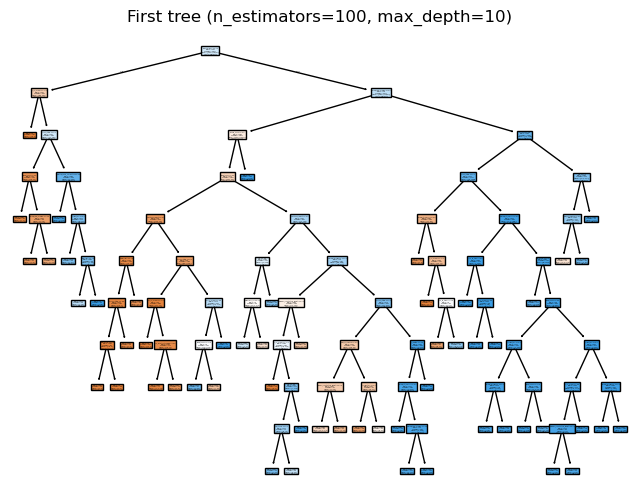


Random Forest: n_estimators=200, max_depth=5


c:\Users\liula\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion matrix:
[[1336  172]
 [  83 1726]]
              precision    recall  f1-score   support

          -1       0.94      0.89      0.91      1508
           1       0.91      0.95      0.93      1809

    accuracy                           0.92      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

Feature importances:
[4.30579608e-03 1.20777432e-03 2.00831602e-03 3.68895887e-04
 5.42425458e-04 4.30223423e-02 6.46997802e-02 4.23754094e-01
 1.36300179e-02 1.04762327e-03 3.99914477e-04 6.91045468e-04
 1.97497842e-02 2.80603746e-01 2.58415829e-02 1.61522673e-02
 5.11170131e-04 1.14089336e-03 6.39349799e-04 9.27674390e-04
 2.84614263e-06 1.93212924e-03 3.45495538e-04 3.42196066e-03
 2.36282757e-03 7.98284404e-02 3.33547914e-03 4.44629306e-03
 2.29217269e-03 7.87861653e-04]


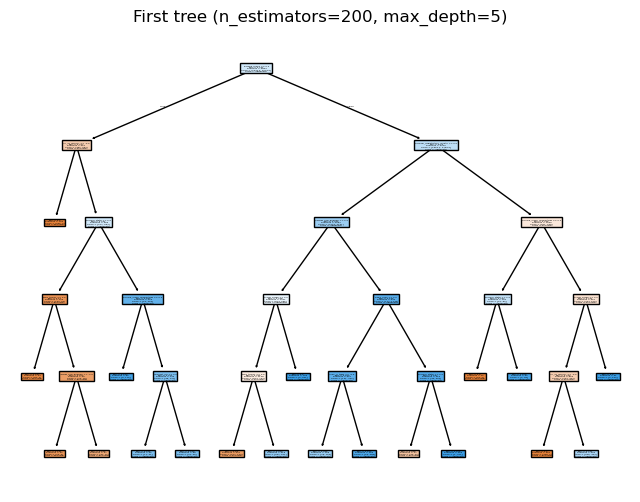


Yhteenveto hyperparametrien vaikutuksesta:
   n_estimators  max_depth  accuracy  precision    recall        f1
0            50        NaN  0.930057   0.915219  0.960752  0.937433
1           100        NaN  0.927947   0.915344  0.956329  0.935388
2           100        5.0  0.923425   0.910724  0.953013  0.931388
3           100       10.0  0.927645   0.913984  0.957435  0.935205
4           200        5.0  0.923123   0.909378  0.954118  0.931211

Paras tulos: n_estimators=50.0, max_depth=nan, accuracy=0.9301


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import pandas as pd

# Hyperparametrien testaus
param_grid = [(50, None), (100, None), (100, 5), (100, 10), (200, 5)] # (n_estimators, max_depth)
results = []

for n_estimators, max_depth in param_grid:
    print(f"\nRandom Forest: n_estimators={n_estimators}, max_depth={max_depth}")
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, bootstrap=True, max_samples=0.7, min_samples_leaf=30, random_state=randomstate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1})
    print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    print('Feature importances:')
    print(model.feature_importances_)
    # Visuali<
    plt.figure(figsize=(8, 6))
    plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['phishing', 'legitimate'])
    plt.title(f'First tree (n_estimators={n_estimators}, max_depth={max_depth})')
    plt.show()

# Display results
results_df = pd.DataFrame(results)
print("\nYhteenveto hyperparametrien vaikutuksesta:")
print(results_df)
best = results_df.sort_values('accuracy', ascending=False).iloc[0]
print(f"\nParas tulos: n_estimators={best['n_estimators']}, max_depth={best['max_depth']}, accuracy={best['accuracy']:.4f}")

## Evaluation

evaluate the model
- How well does the model perform?
- Does it meet the business requirements?

In [11]:
# hell world

## Deployment

johtopäätös / creating a recommendation of how to use the model in practice, or what to do next
- How will the model be used in practice?
- How will the results be communicated?

In [12]:
# hello world

### Reflection

#### Ai Usage
- for research

#### Team contribution
- who did what

#### Sources
- links & descriptions